## 13.3

In [ ]:
import numpy as np
X = np.ones((13,2))
X[:,1] = np.asarray([1971, 1972, 1974, 1978, 1982, 1985, 1989, 1993, 1997, 1999, 2000, 2002, 2003]) - 1970
y = np.log10([2250,2500,5000,29000,120000,275000,1180000,3100000,7500000,24000000,42000000,220000000,410000000])
b = np.linalg.inv(X.T@X)@X.T@y
print(b)

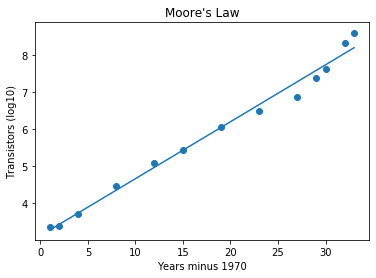

In [24]:
import matplotlib.pyplot as plt
plt.scatter(X[:,1], y)
plt.plot(X[:,1], b[1]*(X[:,1]) + b[0], linestyle='-')
plt.title("Moore's Law")
plt.xlabel("Years minus 1970")
plt.ylabel("Transistors (log10)")
plt.show()

In [30]:
#B
##Prediction:
transitors = 10**(b[0] + b[1]*(2015-1970))
actual = 4*(10**9)
print("Predicted: ", transitors)
print("Actual", actual)
print("Difference", transitors/actual)

Predicted:  11387036868.698683
Actual 4000000000
Difference 2.8467592171746707


C
It seems like the predicted transistors undershot the actual number of transitors by about 1 year. However, it still incredibly accurate and it may be more consistent this year with Intel's failed 10nm chip (lol).

## 13.17

(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)
(100,)


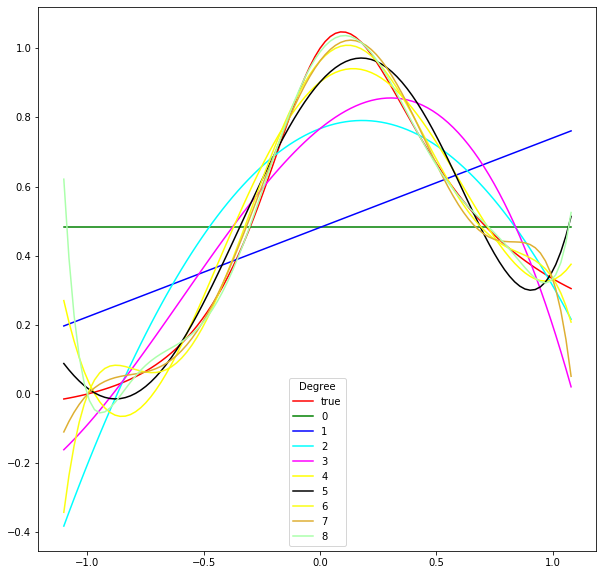

In [60]:
x = []
for i in range(1,12):
    val = -1 + .2*(i-1)
    x.append(val)
x = np.asarray(x)
y = (1+x)/(1+5*x**2)
step = 1.1*2 /100
xtrue = np.arange(-1.1,1.1,step)
step = 1.1*2 /10
xtest = np.arange(-1.1,1.1,step)
ytrue = (1+xtrue)/(1+5*xtrue**2)
ytest = (1+xtest)/(1+5*xtest**2)
uptodegree = 8


#Function to transform data to required model degree form
def makeX(x, degree):
    X= []
    for i in range(degree+1):
        X.append(x**i)
    X = np.asarray(X).T
    return X

models = []
#Get models
for degree in range(uptodegree+1):
    X = makeX(x,degree)
    coef = np.linalg.inv(X.T@X)@X.T@y
    models.append(coef)
ys = []
counter = 0
for model in models:
    X = makeX(xtrue, counter)
    counter += 1
    print(np.asarray(model @ X.T).shape)
    ys.append(model.T @ X.T)
    
plt.figure(figsize=(10,10))
colors = ['green', 'blue', 'cyan', 'magenta', 'yellow', 'black', '#fafe12', '#deaf32', '#abffab' ]
plt.plot(xtrue, ytrue, color = 'red', label="true")
counter = 0
for a in ys:
    print(np.asarray(a).shape)
    plt.plot(xtrue, a , color = colors[counter], label=counter)
    counter +=1
    
plt.legend(title="Degree")

(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)
(10,)


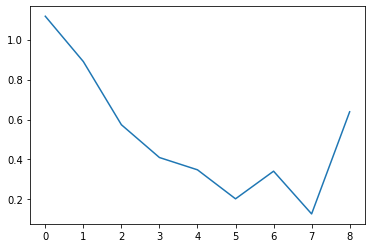

In [66]:
ypreds = []
counter =0
for model in models:
    X = makeX(xtest, counter)
    counter += 1
    print(np.asarray(model @ X.T).shape)
    ypreds.append(model.T @ X.T)
rmses = []
for i in range(len(ypreds)):
    rms = np.sqrt(np.sum((ypreds[i] - ytest)**2))
    rmses.append(rms)
plt.plot(rmses)

degree 7 looks to be the best based on it having the lowest rms.

## 14.7

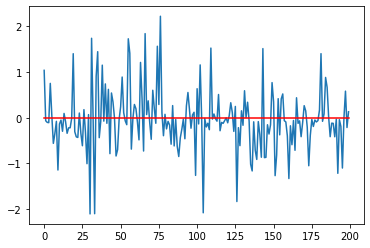

In [96]:
vecs =   []
for i in range(200):
    vc = []
    vc.append(np.random.normal(0,1))
    vc.append(np.random.normal(0,1))
    vecs.append(vc)
vecs = np.asarray(vecs)

y = []
for i in range(len(vecs)):
    if (vecs[i][0] * vecs[i][1] >= 0):
        y.append(1)
    else:
        y.append(-1)

#Function to transform data to required model degree form
def makeX2(x, degree):
    X= []
    for i in x:
        a = []
        a.append(1)
        a.append(i[0])
        a.append(i[1])
        a.append(i[0]**2)
        a.append(i[0]*i[1])
        a.append(i[1]**2)
        X.append(a)
    return np.asarray(X)
#degree 2, show where Fx = 1 and fx = -1, compare coefficients with fx = x1x2 which is exact

Xbomb = np.asarray(makeX2(vecs, 2))


coef = np.linalg.inv(Xbomb.T @ Xbomb)@Xbomb.T @y
ypreds = coef.T @ Xbomb.T    
plt.plot(ypreds)
plt.plot(np.zeros((200,1)), color='red')

Above the line is f(x) = 1
<br>
Below the line is f(x) = -1

In [104]:
for j in range(len(ypreds)):
    if ypreds[j] < 0:
        ypreds[j] = -1
    else:
        ypreds[j] = 1
rmsa = np.sum((y - ypreds)**2)/200

#Function to transform data to required model degree form
def makeX3(x, degree):
    X= []
    for i in x:
        a = []
        a.append(i[0] * i[1])
        X.append(a)
    return np.asarray(X)
Xbomb2 = makeX3(vecs, 2)
coef2 = np.linalg.inv(Xbomb2.T @ Xbomb2) @ Xbomb2.T @ y
ypreds2 = coef2.T @ Xbomb2.T
for j in range(len(ypreds2)):
    if ypreds2[j] < 0:
        ypreds2[j] = -1
    else:
        ypreds2[j] = 1
rmsb = np.sum((y - ypreds2)**2)/200
print("error of first classifier", rmsa)
print("error of second classifier", rmsb)

error of first classifier 0.48
error of second classifier 0.0


The first classifier is not terrible in approximating. The second classifer achieves 0 as it is the 
emperical form of the true function

## 12.6

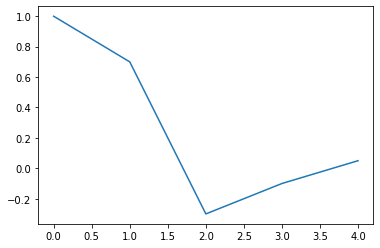

In [105]:
c = [1,.7,-.3,-.1,.05]
e1 = np.random.normal(0, 1, 5)
h = []
for ci,e1i in zip(c,e1):
    h.append(e1i/ci)
plt.plot(c)

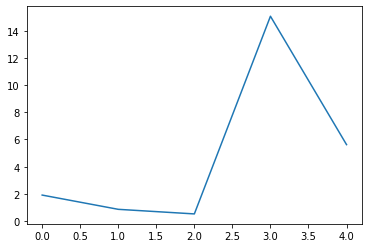

In [106]:
plt.plot(h)

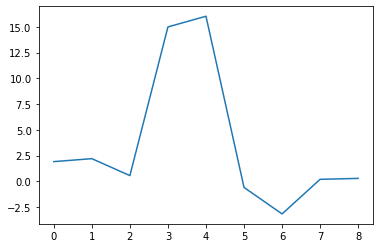

In [108]:
plt.plot(np.convolve(c,h))